In [2]:
# lets import some libraries files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# lets load the digits dataset from sklearn and instanciate this
from sklearn.datasets import load_digits
mydigits = load_digits()


In [6]:
mydigits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

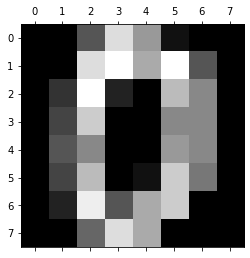

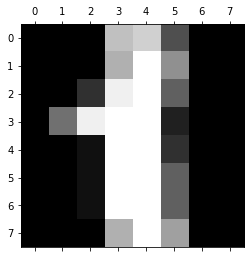

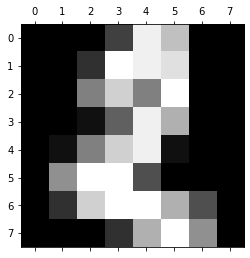

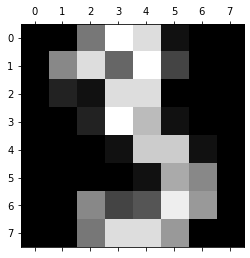

In [17]:
plt.gray() # to plot the graph in gray
# iterate the images
for i in range(4):
    plt.matshow(mydigits.images[i])


In [19]:
# now lets figureout the elements of  mydigits
dir(mydigits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [20]:
# in mydigits we already have target value so lets verify what is tartget
mydigits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
# the target is the final classification label of our varriable
#lets see how our first 4 data are assigned as
mydigits.target[:4]

array([0, 1, 2, 3])

In [43]:
# as we are creating random forest for decision sor lets create our data set
# we need data set because the model requires data set with target
df = pd.DataFrame(mydigits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
# lets define our target
df['target'] = mydigits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [45]:
#now define our X components without target because the target in same df table 
X = df.drop('target', axis='columns')
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [46]:
# assign y as our target
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [47]:
# now lets import the training and testin set from sklearn
# giving test_size=0.2 which means the 20% of data will be used as test data while 
# 80% of data are used for training approach
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
# lets check the length of training testing and total data
len(X_train), len(X_test), len(X)

(1437, 360, 1797)

In [50]:
# now lets import the randomforest classifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
# instanciate classifier as mymodel
# here the n_estimators is defined as number of tree so the decision 
# will be taken after asking defined  number of estimators in n_estimators
# if we do not use n_estimators then it will automatically create 10 estimators by default
mymodel = RandomForestClassifier(n_estimators=100)

In [55]:
# now the time has come to fith our model with the training
mymodel.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
# hey common we need to check the score
mymodel.score(X_test,y_test)

0.9861111111111112

In [57]:
# it means our model is 98.6% accurate in predicting our model

In [60]:
# lets see our predicted value as y_predicted
y_predicted = mymodel.predict(X_test)
y_predicted

array([7, 9, 4, 2, 2, 6, 1, 4, 4, 0, 6, 5, 7, 9, 9, 4, 8, 7, 3, 8, 3, 6,
       7, 8, 7, 7, 9, 8, 3, 4, 3, 3, 8, 1, 9, 9, 3, 4, 5, 0, 3, 6, 8, 1,
       6, 3, 9, 1, 6, 0, 2, 8, 8, 3, 0, 8, 6, 5, 1, 2, 5, 1, 8, 5, 6, 5,
       9, 4, 9, 4, 8, 0, 8, 5, 2, 3, 5, 1, 7, 7, 1, 9, 0, 0, 0, 8, 7, 5,
       8, 7, 5, 0, 0, 7, 1, 5, 2, 8, 9, 5, 1, 1, 9, 7, 0, 2, 3, 3, 1, 1,
       1, 1, 5, 3, 9, 6, 6, 6, 0, 9, 1, 8, 7, 7, 9, 9, 5, 7, 3, 9, 2, 7,
       6, 2, 3, 2, 0, 0, 1, 4, 1, 7, 0, 3, 3, 1, 4, 2, 2, 2, 3, 0, 0, 4,
       5, 5, 7, 7, 3, 5, 3, 1, 4, 6, 4, 9, 1, 7, 9, 3, 2, 1, 6, 6, 8, 7,
       8, 1, 2, 2, 2, 9, 1, 4, 8, 5, 8, 4, 2, 9, 0, 8, 0, 9, 6, 3, 1, 4,
       7, 8, 1, 5, 9, 4, 5, 9, 2, 1, 1, 2, 5, 6, 5, 6, 0, 9, 9, 6, 1, 8,
       9, 6, 9, 6, 9, 0, 5, 5, 1, 2, 8, 0, 3, 1, 4, 0, 4, 8, 2, 7, 8, 7,
       8, 6, 6, 6, 0, 5, 6, 7, 0, 9, 5, 3, 8, 7, 9, 3, 9, 8, 6, 2, 4, 6,
       3, 8, 0, 9, 4, 4, 4, 5, 1, 7, 9, 8, 6, 0, 8, 6, 2, 2, 3, 6, 5, 5,
       4, 9, 7, 4, 7, 3, 8, 6, 2, 6, 8, 1, 7, 4, 4,

In [62]:
# now lets see our confusion matrix to view the predicted value
# for this import confusion matrix from sklearn.metrics

In [63]:
 from sklearn.metrics import confusion_matrix

In [67]:
# confusion matrix takes testing value and predicted values
# after that it returns the array with based on dimension as predicted
# no of time wrong and true values of datas
cm = confusion_matrix(y_test,y_predicted)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]])

In [68]:
# we can give beautiful view to our matrix so we will choose the seaborn 
# for viewing it

Text(69.0, 0.5, 'Truth Value')

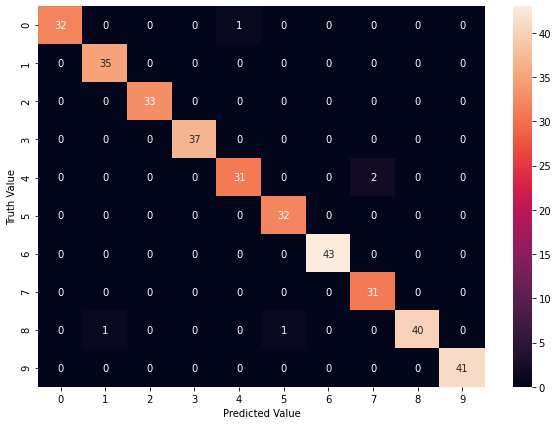

In [70]:
import seaborn as sns
plt.figure(figsize=(10,7)) # defining the size of figure
sns.heatmap(cm,annot=True) # define the heatmap which will take cm 
plt.xlabel('Predicted Value') # defining the x label
plt.ylabel('Truth Value') # defining y label

In [71]:
# now from the confusion matrix we can predict and say our model has
# predicted actual value at where and when it was wrong in predicion